In [1]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_hdf('aa_one_hot_highlow.h5')

In [3]:
data.head()

,class,prest_id,conc_cf,aa_one_hot
1,0,140099,2.91540,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,0,140225,1.48770,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
5,0,140325,1.50290,"[[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,..."
8,0,140354,0.92003,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
10,0,140500,2.21830,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [4]:
data.tail()

,class,prest_id,conc_cf,aa_one_hot
45201,1,4550047,12.28,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
45202,1,4550053,11.18,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
45203,1,4550054,10.94,"[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,..."
45204,1,4560007,11.30,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,..."
45205,1,4560013,9.38,"[[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [5]:
data['aa_one_hot'][1].shape

(149, 20)

In [6]:
# create a 3D array of one one hot encodings
max_len = 149
width = 20
num_samples = data.shape[0]

X = np.zeros((num_samples, max_len, width))
for idx, aa_one_hot in enumerate(data['aa_one_hot'].values):
    X[idx, :, :] = aa_one_hot

    
y = data['class'].values

In [7]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [41]:
def make_model(x_train, y_train, x_test, y_test, filt_width=3, epochs=1):

    # simple model per Yoon Kim (2014)
    from keras.models import Sequential
    from keras.layers import Dense, Dropout, Flatten
    from keras.layers import Conv1D, GlobalMaxPooling1D, AveragePooling1D
    model = Sequential()
    model.add(Conv1D(20, filt_width, activation='relu', input_shape=(149, 20)))
    #model.add(AveragePooling1D(pool_size=2, strides=None, padding='valid'))
    #model.add(GlobalMaxPooling1D())
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(32))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    model.fit(x_train, y_train, batch_size=50, epochs=epochs,
              validation_data=(x_test, y_test), verbose=2)
    model.save('model_no_pool'+ str(filt_width) + '.h5')
    print('model saved as: ', 'model_no_pool'+ str(filt_width) + '.h5')
    return

In [42]:
epochs = 25

In [43]:
make_model(x_train, y_train, x_test, y_test, filt_width=3, epochs=epochs)

Train on 15822 samples, validate on 6781 samples
Epoch 1/25
 - 12s - loss: 0.6953 - acc: 0.5478 - val_loss: 0.6664 - val_acc: 0.5950
Epoch 2/25
 - 9s - loss: 0.6543 - acc: 0.6097 - val_loss: 0.6524 - val_acc: 0.6169
Epoch 3/25
 - 9s - loss: 0.6392 - acc: 0.6303 - val_loss: 0.6518 - val_acc: 0.6192
Epoch 4/25
 - 9s - loss: 0.6354 - acc: 0.6377 - val_loss: 0.6516 - val_acc: 0.6164
Epoch 5/25
 - 9s - loss: 0.6269 - acc: 0.6493 - val_loss: 0.6497 - val_acc: 0.6226
Epoch 6/25
 - 9s - loss: 0.6200 - acc: 0.6538 - val_loss: 0.6492 - val_acc: 0.6238
Epoch 7/25
 - 9s - loss: 0.6170 - acc: 0.6595 - val_loss: 0.6530 - val_acc: 0.6116
Epoch 8/25
 - 9s - loss: 0.6131 - acc: 0.6542 - val_loss: 0.6514 - val_acc: 0.6256
Epoch 9/25
 - 9s - loss: 0.6096 - acc: 0.6638 - val_loss: 0.6547 - val_acc: 0.6135
Epoch 10/25
 - 9s - loss: 0.6056 - acc: 0.6665 - val_loss: 0.6573 - val_acc: 0.6160
Epoch 11/25
 - 9s - loss: 0.6041 - acc: 0.6724 - val_loss: 0.6551 - val_acc: 0.6207
Epoch 12/25
 - 9s - loss: 0.6020 - 

In [44]:
make_model(x_train, y_train, x_test, y_test, filt_width=4, epochs=epochs)

Train on 15822 samples, validate on 6781 samples
Epoch 1/25
 - 13s - loss: 0.6854 - acc: 0.5636 - val_loss: 0.6553 - val_acc: 0.6107
Epoch 2/25
 - 10s - loss: 0.6486 - acc: 0.6212 - val_loss: 0.6481 - val_acc: 0.6276
Epoch 3/25
 - 10s - loss: 0.6355 - acc: 0.6412 - val_loss: 0.6483 - val_acc: 0.6234
Epoch 4/25
 - 10s - loss: 0.6294 - acc: 0.6436 - val_loss: 0.6470 - val_acc: 0.6259
Epoch 5/25
 - 11s - loss: 0.6213 - acc: 0.6510 - val_loss: 0.6482 - val_acc: 0.6245
Epoch 6/25
 - 10s - loss: 0.6145 - acc: 0.6584 - val_loss: 0.6500 - val_acc: 0.6247
Epoch 7/25
 - 10s - loss: 0.6097 - acc: 0.6654 - val_loss: 0.6484 - val_acc: 0.6296
Epoch 8/25
 - 10s - loss: 0.6036 - acc: 0.6714 - val_loss: 0.6507 - val_acc: 0.6234
Epoch 9/25
 - 10s - loss: 0.6016 - acc: 0.6718 - val_loss: 0.6509 - val_acc: 0.6260
Epoch 10/25
 - 10s - loss: 0.5981 - acc: 0.6748 - val_loss: 0.6516 - val_acc: 0.6276
Epoch 11/25
 - 10s - loss: 0.5948 - acc: 0.6794 - val_loss: 0.6523 - val_acc: 0.6235
Epoch 12/25
 - 10s - loss

In [45]:
make_model(x_train, y_train, x_test, y_test, filt_width=5, epochs=epochs)

Train on 15822 samples, validate on 6781 samples
Epoch 1/25
 - 13s - loss: 0.6949 - acc: 0.5497 - val_loss: 0.6640 - val_acc: 0.5946
Epoch 2/25
 - 11s - loss: 0.6483 - acc: 0.6233 - val_loss: 0.6478 - val_acc: 0.6259
Epoch 3/25
 - 11s - loss: 0.6323 - acc: 0.6436 - val_loss: 0.6456 - val_acc: 0.6301
Epoch 4/25
 - 11s - loss: 0.6242 - acc: 0.6548 - val_loss: 0.6464 - val_acc: 0.6304
Epoch 5/25
 - 11s - loss: 0.6132 - acc: 0.6626 - val_loss: 0.6460 - val_acc: 0.6319
Epoch 6/25
 - 11s - loss: 0.6066 - acc: 0.6698 - val_loss: 0.6474 - val_acc: 0.6344
Epoch 7/25
 - 11s - loss: 0.6001 - acc: 0.6749 - val_loss: 0.6434 - val_acc: 0.6381
Epoch 8/25
 - 11s - loss: 0.5925 - acc: 0.6863 - val_loss: 0.6404 - val_acc: 0.6387
Epoch 9/25
 - 11s - loss: 0.5858 - acc: 0.6863 - val_loss: 0.6400 - val_acc: 0.6409
Epoch 10/25
 - 11s - loss: 0.5836 - acc: 0.6890 - val_loss: 0.6418 - val_acc: 0.6313
Epoch 11/25
 - 11s - loss: 0.5792 - acc: 0.6931 - val_loss: 0.6394 - val_acc: 0.6335
Epoch 12/25
 - 11s - loss

In [46]:
make_model(x_train, y_train, x_test, y_test, filt_width=6, epochs=epochs)

Train on 15822 samples, validate on 6781 samples
Epoch 1/25
 - 13s - loss: 0.6950 - acc: 0.5480 - val_loss: 0.6570 - val_acc: 0.6065
Epoch 2/25
 - 11s - loss: 0.6455 - acc: 0.6313 - val_loss: 0.6442 - val_acc: 0.6304
Epoch 3/25
 - 11s - loss: 0.6279 - acc: 0.6493 - val_loss: 0.6427 - val_acc: 0.6270
Epoch 4/25
 - 11s - loss: 0.6207 - acc: 0.6562 - val_loss: 0.6414 - val_acc: 0.6325
Epoch 5/25
 - 11s - loss: 0.6104 - acc: 0.6631 - val_loss: 0.6443 - val_acc: 0.6279
Epoch 6/25
 - 11s - loss: 0.6033 - acc: 0.6735 - val_loss: 0.6419 - val_acc: 0.6337
Epoch 7/25
 - 11s - loss: 0.5961 - acc: 0.6781 - val_loss: 0.6436 - val_acc: 0.6294
Epoch 8/25
 - 11s - loss: 0.5868 - acc: 0.6861 - val_loss: 0.6428 - val_acc: 0.6322
Epoch 9/25
 - 11s - loss: 0.5835 - acc: 0.6909 - val_loss: 0.6433 - val_acc: 0.6332
Epoch 10/25
 - 11s - loss: 0.5766 - acc: 0.6954 - val_loss: 0.6418 - val_acc: 0.6350
Epoch 11/25
 - 11s - loss: 0.5745 - acc: 0.6963 - val_loss: 0.6430 - val_acc: 0.6338
Epoch 12/25
 - 11s - loss

In [47]:
make_model(x_train, y_train, x_test, y_test, filt_width=8, epochs=epochs)

Train on 15822 samples, validate on 6781 samples
Epoch 1/25
 - 15s - loss: 0.6825 - acc: 0.5646 - val_loss: 0.6498 - val_acc: 0.6228
Epoch 2/25
 - 13s - loss: 0.6417 - acc: 0.6312 - val_loss: 0.6464 - val_acc: 0.6203
Epoch 3/25
 - 14s - loss: 0.6252 - acc: 0.6493 - val_loss: 0.6535 - val_acc: 0.6207
Epoch 4/25
 - 12s - loss: 0.6155 - acc: 0.6600 - val_loss: 0.6454 - val_acc: 0.6248
Epoch 5/25
 - 12s - loss: 0.6066 - acc: 0.6708 - val_loss: 0.6444 - val_acc: 0.6300
Epoch 6/25
 - 12s - loss: 0.5954 - acc: 0.6790 - val_loss: 0.6391 - val_acc: 0.6322
Epoch 7/25
 - 12s - loss: 0.5819 - acc: 0.6912 - val_loss: 0.6448 - val_acc: 0.6344
Epoch 8/25
 - 12s - loss: 0.5761 - acc: 0.6978 - val_loss: 0.6334 - val_acc: 0.6384
Epoch 9/25
 - 12s - loss: 0.5663 - acc: 0.6953 - val_loss: 0.6391 - val_acc: 0.6337
Epoch 10/25
 - 12s - loss: 0.5618 - acc: 0.7072 - val_loss: 0.6375 - val_acc: 0.6357
Epoch 11/25
 - 11s - loss: 0.5577 - acc: 0.7081 - val_loss: 0.6347 - val_acc: 0.6381
Epoch 12/25
 - 11s - loss

In [48]:
make_model(x_train, y_train, x_test, y_test, filt_width=10, epochs=epochs)

Train on 15822 samples, validate on 6781 samples
Epoch 1/25
 - 16s - loss: 0.6854 - acc: 0.5666 - val_loss: 0.6618 - val_acc: 0.5964
Epoch 2/25
 - 13s - loss: 0.6393 - acc: 0.6359 - val_loss: 0.6520 - val_acc: 0.6164
Epoch 3/25
 - 13s - loss: 0.6258 - acc: 0.6504 - val_loss: 0.6419 - val_acc: 0.6344
Epoch 4/25
 - 13s - loss: 0.6101 - acc: 0.6669 - val_loss: 0.6423 - val_acc: 0.6340
Epoch 5/25
 - 13s - loss: 0.5992 - acc: 0.6694 - val_loss: 0.6442 - val_acc: 0.6298
Epoch 6/25
 - 13s - loss: 0.5845 - acc: 0.6859 - val_loss: 0.6494 - val_acc: 0.6349
Epoch 7/25
 - 13s - loss: 0.5702 - acc: 0.6973 - val_loss: 0.6383 - val_acc: 0.6363
Epoch 8/25
 - 13s - loss: 0.5604 - acc: 0.7071 - val_loss: 0.6371 - val_acc: 0.6439
Epoch 9/25
 - 13s - loss: 0.5518 - acc: 0.7136 - val_loss: 0.6372 - val_acc: 0.6433
Epoch 10/25
 - 13s - loss: 0.5416 - acc: 0.7187 - val_loss: 0.6419 - val_acc: 0.6396
Epoch 11/25
 - 13s - loss: 0.5346 - acc: 0.7270 - val_loss: 0.6439 - val_acc: 0.6368
Epoch 12/25
 - 13s - loss

In [49]:
make_model(x_train, y_train, x_test, y_test, filt_width=12, epochs=epochs)

Train on 15822 samples, validate on 6781 samples
Epoch 1/25
 - 17s - loss: 0.6818 - acc: 0.5660 - val_loss: 0.6511 - val_acc: 0.6198
Epoch 2/25
 - 15s - loss: 0.6376 - acc: 0.6361 - val_loss: 0.6444 - val_acc: 0.6298
Epoch 3/25
 - 15s - loss: 0.6190 - acc: 0.6572 - val_loss: 0.6415 - val_acc: 0.6360
Epoch 4/25
 - 14s - loss: 0.6054 - acc: 0.6689 - val_loss: 0.6395 - val_acc: 0.6288
Epoch 5/25
 - 14s - loss: 0.5889 - acc: 0.6859 - val_loss: 0.6321 - val_acc: 0.6414
Epoch 6/25
 - 14s - loss: 0.5671 - acc: 0.7026 - val_loss: 0.6300 - val_acc: 0.6453
Epoch 7/25
 - 14s - loss: 0.5544 - acc: 0.7120 - val_loss: 0.6328 - val_acc: 0.6405
Epoch 8/25
 - 14s - loss: 0.5422 - acc: 0.7208 - val_loss: 0.6294 - val_acc: 0.6452
Epoch 9/25
 - 14s - loss: 0.5362 - acc: 0.7217 - val_loss: 0.6285 - val_acc: 0.6511
Epoch 10/25
 - 14s - loss: 0.5279 - acc: 0.7296 - val_loss: 0.6299 - val_acc: 0.6489
Epoch 11/25
 - 14s - loss: 0.5193 - acc: 0.7351 - val_loss: 0.6326 - val_acc: 0.6552
Epoch 12/25
 - 14s - loss

## Make an ensemble with these models

In [50]:
#load all the models
import keras
model_no_pool3 = keras.models.load_model('model_no_pool3.h5')
model_no_pool4 = keras.models.load_model('model_no_pool4.h5')
model_no_pool5 = keras.models.load_model('model_no_pool5.h5')
model_no_pool6 = keras.models.load_model('model_no_pool6.h5')
model_no_pool8 = keras.models.load_model('model_no_pool8.h5')
model_no_pool10 = keras.models.load_model('model_no_pool10.h5')
model_no_pool12 = keras.models.load_model('model_no_pool12.h5')


In [51]:
x = x_train
y = y_train

y_pred3 = model_no_pool3.predict(x)
y_pred4 = model_no_pool4.predict(x)
y_pred5 = model_no_pool5.predict(x)
y_pred6 = model_no_pool6.predict(x)
y_pred8 = model_no_pool8.predict(x)
y_pred10 = model_no_pool10.predict(x)
y_pred12 = model_no_pool12.predict(x)

y_pred_total = np.round((y_pred3 + y_pred4 + y_pred5 + y_pred6 + y_pred8 + y_pred10 + y_pred12)/7)

z = y_pred_total == np.reshape(y, [-1,1])

print('Train acc')
np.sum(z)/len(z)

Train acc


0.84129692832764502

In [62]:
x = x_train
y = y_train


y_pred12 = model_no_pool12.predict(x)

y_pred_total = np.round(y_pred12)

z = y_pred_total == np.reshape(y, [-1,1])

print('Train acc')
np.sum(z)/len(z)

Train acc


0.84287700669953225

In [63]:
x = x_test
y = y_test


y_pred12 = model_no_pool12.predict(x)

y_pred_total = np.round(y_pred12)

z = y_pred_total == np.reshape(y, [-1,1])

print('Test acc')
np.sum(z)/len(z)

Test acc


0.65403332841763751

# Filter Vizualization

In [56]:
#try to vizulaize the filters
weights = model_no_pool8.get_weights()

In [57]:
weights[0].shape

(8, 20, 20)

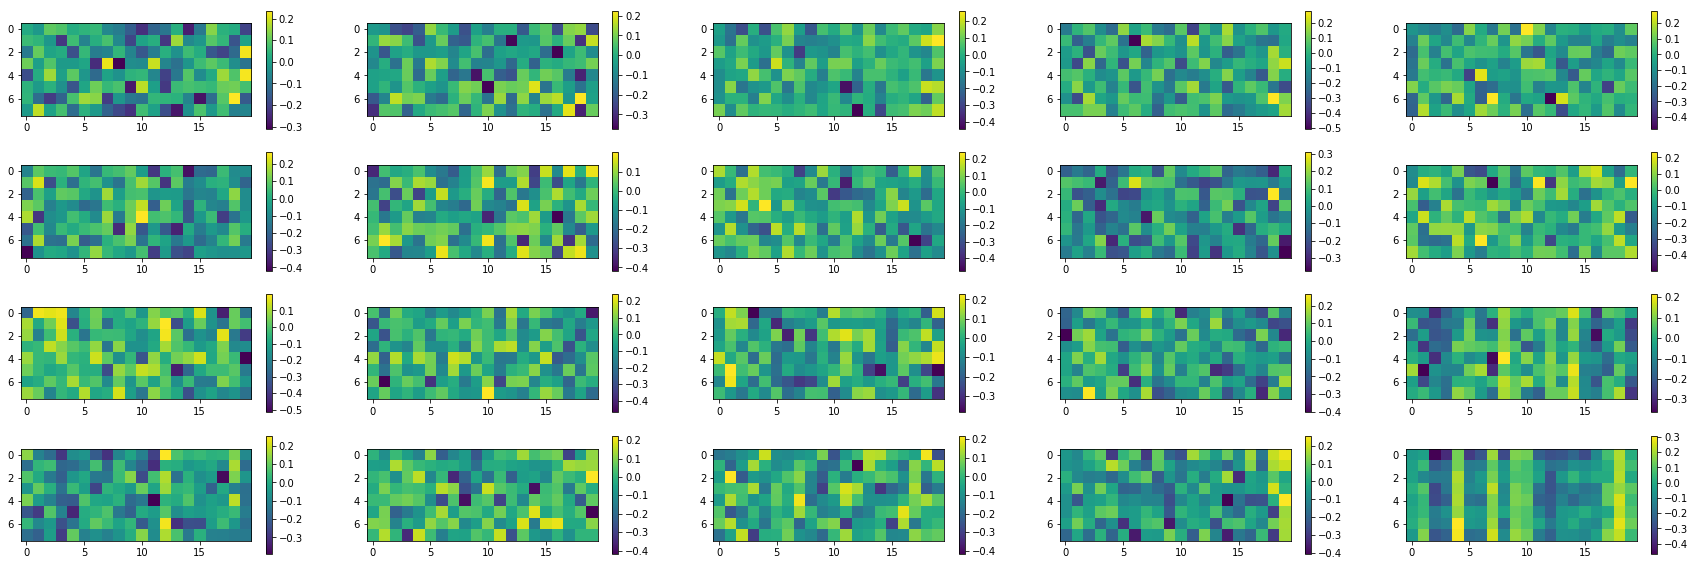

In [59]:
#I'm expecting 10 filters that are 8 x 20
#if I'm interpreting this correctly the weights[0] is and array [8x20 filter, 10 filters]

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(30,10))
for ind in range(1,21):
    w = weights[0][:,:,ind-1]
    plt.subplot(4,5,ind)
    plt.imshow(w)
    plt.colorbar()

since the data only has a single hot pixel in each row, I would expect to see similar patterns in the filters, but this doesn't look much like that so maybe there is some more work to be done here or my expecation is wrong.